<a href="https://colab.research.google.com/github/Duddu64/PDI/blob/main/DesafiodeStanford1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

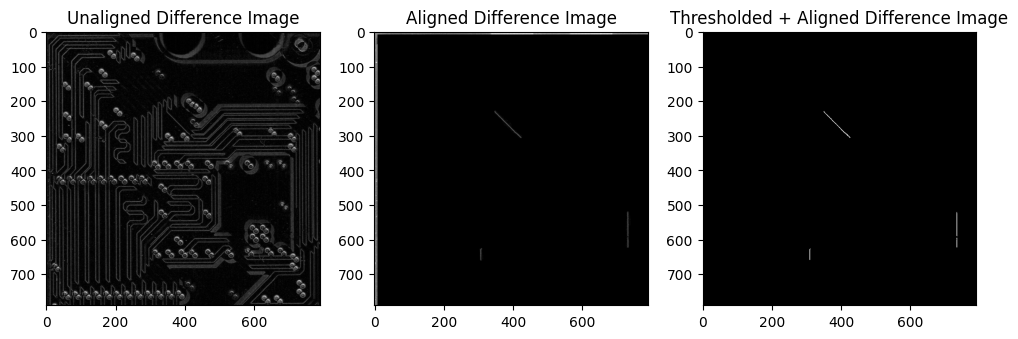

True

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

origImg = cv2.imread('/content/pcbCropped.png', cv2.IMREAD_GRAYSCALE) / 255.0
defectImg = cv2.imread('/content/pcbCroppedTranslatedDefected.png', cv2.IMREAD_GRAYSCALE) / 255.0

row, col = origImg.shape

xShift = 10
yShift = 10

registImg = np.zeros_like(defectImg)
registImg[yShift : row, xShift : col] = defectImg[0 : row - yShift, 0 : col - xShift]

diffImg1 = np.abs(origImg - defectImg)
diffImg2 = np.abs(origImg - registImg)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(diffImg1, cmap='gray')
plt.title('Unaligned Difference Image')

plt.subplot(1, 3, 2)
plt.imshow(diffImg2, cmap='gray')
plt.title('Aligned Difference Image')

bwImg = diffImg2 > 0.15

height, width = bwImg.shape
border = round(0.05 * width)
borderMask = np.zeros_like(bwImg)
borderMask[border:height-border, border:width-border] = 1

bwImg = bwImg * borderMask

plt.subplot(1, 3, 3)
plt.imshow(bwImg, cmap='gray')
plt.title('Thresholded + Aligned Difference Image')

plt.show()

cv2.imwrite('Defect_Detection_diff.png', (diffImg1 * 255).astype(np.uint8))
cv2.imwrite('Defect_Detection_diffRegisted.png', (diffImg2 * 255).astype(np.uint8))
cv2.imwrite('Defect_Detection_bw.png', (bwImg * 255).astype(np.uint8))
